# Task Diversity Checker

## 1. Understanding Scientific Papers

In the article, Recasens et al. try to detect indicators of bias in Wikipedia articles. In order to do this they use automated techniques instead of more traditional methods like close reading. One of the most interesting parts of their research is the data they selected: Wikipedia's so-called Neutral Point of View data (NPOV). The NPOV dataset includes a very useful subset of words or phrases that are edited and thereby implicit labelled as biased words or phrases. The authors determine two types of bias: framing bias which consists of subjective language from a certain point of view and epistemological bias that refers to language structures indicating the believability of a proposition. Using machine learning algorithms Recasens et al. try to come up with a model that is able to preform automated detection of bias in texts. The research especially shows its quality in the construction of the feature vector for the machine learning part of the study and more specifically in their selection of context features. This aspect takes into account that the meaning of a word is highly depended of its place in a sentence or even text and the terms that surround the word in question. After comparing their model of automated bias detection with the results of humans that conducted the same task, the researches end up with a model that has reasonable to even good results. Recasens et al. conclude that epistemological bias is far more difficult to detect than framing bias, for humans as well as for machines. The project is innovative in the way that it includes this sometimes ignored epistemological bias and successful because of the good prediction results.

Bias is a descent indicator for diversity in texts. One instrument of measure for this diversity are the different viewpoints that are present in a certain text. If there is only a single perspective in a media text, regardless whether it is the dominant perspective, this might be an indicator of a lack of diversity in the text itself. The model that Recasens et al. developed can for this reason serve very well as one of the tools for pointing out diversity in a text, especially because it takes this more implicit epistemological bias into account.
    
Although Kuang and Davison seem to neglect the fact that Recansens et al. did implement some context features, they do make a valid point when they argue that pre-compiled word lists are not fully comprehensive for measuring bias in texts. According to the researchers such pre-compiled word lists predominantly check one word for its possible bias indication and take the place of that word in the context too little into account. More concrete, the study is an improvement of that of Recasens et al. in the way that it aims to detect bias associated with ambiguous words such as "White" or "Arabs". Apart from this, Kuang and Davison also criticise the evaluation method Recansens et al. used since it assumes that every sentence has got a biased word. Instead of working with a word list, the researchers trained two neural language models to generate contextual features that they combine with the features from Recansens et al. to train a logistic regression model for preforming bias detection. The results show that the improvement of this method is especially clear for ambiguous labelled words. This, however comes with a major downside: the contextual features are not that effective when working with non-ambiguous words. Moreover, the effectiveness of the model even seems to drop for datasets with relatively few ambiguous words.

## 2. Understanding media texts and existing tools

The Washingtonpost article reports on a group of college students that decided to tackle the recently popular phenomenon of fake news on social media. During a hackathon, the young researchers teamed-up to provide tools for detecting this fake news live on Facebook. In order to do this they created a chrome plug-in that checks whether a post on the users' Facebook feed corresponds to the characteristics of fake news and assigns that post a visual label accordingly. Secondly, the plug-in also prevents the user from - unconsciously - contributing to the spread of fake news by determining whether the users' post contains any unverified information. The computational side of this tool mainly exists of verification of the posts with a number of API's such as the Microsoft's cognitive services, the Twitter search API, Google's Safe Browsing API and IBM's Watson services. This way they did not only implement a more traditional method like text analysis but also focussed on image recognition and source verification amongst others.

Although the project contains a number of components that might also be useful for a diversity checker - mainly for news that gets spread on social media - I am specifically fond of their idea to implement image recognition. In today's electronic news, images, videos and visualisations are a vital and omnipresent part of a news article. In contrast to paper newspapers where smaller articles usually do not come with an image, electronic news texts almost always contain an image or something of the sort to attract the users' attention. These images or videos are not arbitrary. They can sometimes be the reason for clicking on an article instead of the topic. This is especially the case for so-called 'clickbait' on social media where a very sensational image is used that often does not adequately represent the actual content of the article. Images can also express a powerful sentiment or statement that the author wants to give to the article, an unconscious emotion that is handed over to the reader before he or she even knows the full content of the article. For me, an analysis of the images in the article are an indispensable context feature for the diversity checker, something that cannot be disregarded.

One thing that I find problematic about this project is the discrepancy between the way the researchers dealt with filtering facts and filtering opinions. According to them, facts can be false while opinions cannot. Although I understand what they intend with that statement, I am not totally convinced that it is a good approach to never flag opinions as false. The reason for this is that a significant portion of the fake news consists of falsely stated or intentionally misinterpreted opinions by important people. It is unclear whether the developers included a way to determine these falsely stated opinions but on first sight the tool seems to neglect opinions as a whole. Secondly, I would prefer not only a label that indicates whether a post is verified or not, but some contextual information on why a certain label was given to a certain post as well. That way users can reflect theirselves upon the characteristics of fake news. This idea was also already suggested on the website of the project (http://projectfib.azurewebsites.net/Home/About).

## 3. Data Analysis

### 3.1. General overview of the data

The dataset provided by Harvard Dataverse consists of recent media texts from different media channels: ABC News, CNN news, The Huffington Post, BBC News, DW News, TASS News, Al Jazeera News, China Daily and RTE News. The data was collected using RSS feeds of these news sites and include besides the article's text also the publish date, the title, the subtitle and the URL. Unfortunately, the actual collected content of the articles only consists of plain text, without a lot of contextual information like accompanying images. The dataset was explicitly made available for 'media bias' studies. I was especially interested in whether and how different these media channels report on the same topic. Are there newspapers that are more subjective than others, what is the overall sentiment of a newspaper on a subject and which emotions come forward for that same topic? The selection of the articles - and consequently the topic of choice - is based on titles that include the name "Israel". I intentionally chose a topic that is often a subject for polarisation to see how good the sentiment analysis tools function.

After getting an idea on how lexical diverse each newspaper reports in articles on Israel, the focus was on subjectivity measurement and sentiment analysis. Finally this task includes a more specific emotion analysis of the selected subset. The core tools for this analysis are libraries and API's that are accessible with the Python language. Due to a lack of time, this data analysis does not include a lot of preprocessing of the data but it was necessary to extract the news channel's names from the URL, remove some non-ASCII characters and neglect some NULL-values.

I chose to visually present the results in the form of plots. This is because a visualisation can be a lot more appealing and a lot more provocative than just numbers.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
#sys needed to navigate to the watson module, otherwise he will not find it for some reason --> see http://stackoverflow.com/questions/15514593/importerror-no-module-named-when-trying-to-run-python-script
import sys
sys.path.append('C:/Python27/Lib/site-packages')
from textblob import TextBlob
from watson_developer_cloud import NaturalLanguageUnderstandingV1
import watson_developer_cloud.natural_language_understanding.features.v1 as \
    features

In [2]:
natural_language_understanding = NaturalLanguageUnderstandingV1(version='2017-02-27',
                                                            username='3dc70f07-f21c-4556-ba39-dcb5e324a6a9',
                                                            password='8MZgGp1ydKt8')

In [3]:
article_data = pd.read_csv('NewsArticles.csv', na_values=['?'], sep=',')
print(str(article_data.shape[0]) + ' records')
print(str(article_data.columns.size) + ' attributes:')

article_types = article_data.dtypes
# article_data.head()

3824 records
144 attributes:


In [6]:
media_names = ["abcnews", "cnn", "huffingtonpost", "bbc", "tass", "dw.com", "aljazeera", "cinadaily", "rte"]

### 3.2. Lexical richness

A first way of measuring the diversity between different newspapers is looking at how many unique words their articles contain for a certain topic. Since all of the newspapers are in English, this calculation could highlight the difference in the used vocabulary per newspaper. The so-called lexical difference could also be an indicator of the target audience of a newspaper with a higher diversity index suggesting that the texts are aimed at higher educated readers. Since the selected topic is Israel, this calculation was only preformed for articles that include the term "Israel" in their title.

In [178]:
def lexical_richness(media):

    c_total = 0.0
    c_unique = 0.0
    rich_lst = []
    for i, link in enumerate(article_data['article_source_link']):
        if isinstance(article_data['title'][i], float) == True:
            pass
        else:
            if media in link and "Israel" in article_data['title'][i]:
                if isinstance(article_data['text'][i], float) == True:
                    pass
                else:
                    l_total = len(article_data['text'][i])
                    l_unique = len(set(article_data['text'][i]))
                    c_total += l_total
                    c_unique += l_unique
        if c_total != 0:    
            lex_rich = float((c_unique / c_total) * 100)
            rich_lst.append(lex_rich)
    if len(rich_lst) != 0:
        return sum(rich_lst) / float(len(rich_lst))

print "In all of the article texts together, abc news has a total of %s percent unique words." % str(lexical_richness("abcnews"))
print "In all of the article texts together, cnn news has a total of %s percent unique words." % str(lexical_richness("cnn"))
print "In all of the article texts together, huffingtonpost news has a total of %s percent unique words." % str(lexical_richness("huffingtonpost"))
print "In all of the article texts together, bbc news has a total of %s percent unique words." % str(lexical_richness("bbc"))
print "In all of the article texts together, tass news has a total of %s percent unique words." % str(lexical_richness("tass"))
print "In all of the article texts together, dw news has a total of %s percent unique words." % str(lexical_richness("dw.com"))
print "In all of the article texts together, aljazeera news has a total of %s percent unique words." % str(lexical_richness("aljazeera"))
print "In all of the article texts together, cinadaily news has a total of %s percent unique words." % str(lexical_richness("cinadaily"))
print "In all of the article texts together, rte news has a total of %s percent unique words." % str(lexical_richness("rte"))


In all of the article texts together, abc news has a total of 5.52220888355 percent unique words.
In all of the article texts together, cnn news has a total of 6.59618834073 percent unique words.
In all of the article texts together, huffingtonpost news has a total of 1.66999002991 percent unique words.
In all of the article texts together, bbc news has a total of None percent unique words.
In all of the article texts together, tass news has a total of 7.86324786325 percent unique words.
In all of the article texts together, dw news has a total of 1.5151985007 percent unique words.
In all of the article texts together, aljazeera news has a total of 1.361787283 percent unique words.
In all of the article texts together, cinadaily news has a total of None percent unique words.
In all of the article texts together, rte news has a total of 5.99721059972 percent unique words.


The results show that something is off with the CinaDaily data. Perhaps the double comma separation between the title and the text result in a return of Null-values. BBC News on the other hand, does not seems to have one article with Israel in the title. The fact that such a large information channel has no title that includes the term "Israel" can also be meaningful when looking at diversity in media. Furthermore, the percentages indicate that Tass news has got the highest amount lexical diversity in their articles while Aljazeera News' articles contain the lowest amount of lexical diversity. This is ofcourse based on a small set of articles and is therefore not fit to make any statements on the whole newschannel but it does show some important differences in lexical diversity for the separate newspapers.

The previous calculation just gives an idea on the lexical diversity. A next analysis demonstrates how many words a media channel devoted to news on the topic of Israel.

In all of the article texts together, abc news has a total of 833.0 words.
In all of the article texts together, cnn news has a total of 5739.0 words.
In all of the article texts together, huffingtonpost news has a total of 4012.0 words.
In all of the article texts together, bbc news has a total of 0.0 words.
In all of the article texts together, tass news has a total of 585.0 words.
In all of the article texts together, dw news has a total of 15118.0 words.
In all of the article texts together, aljazeera news has a total of 128649.0 words.
In all of the article texts together, cinadaily news has a total of 0.0 words.
In all of the article texts together, rte news has a total of 717.0 words.


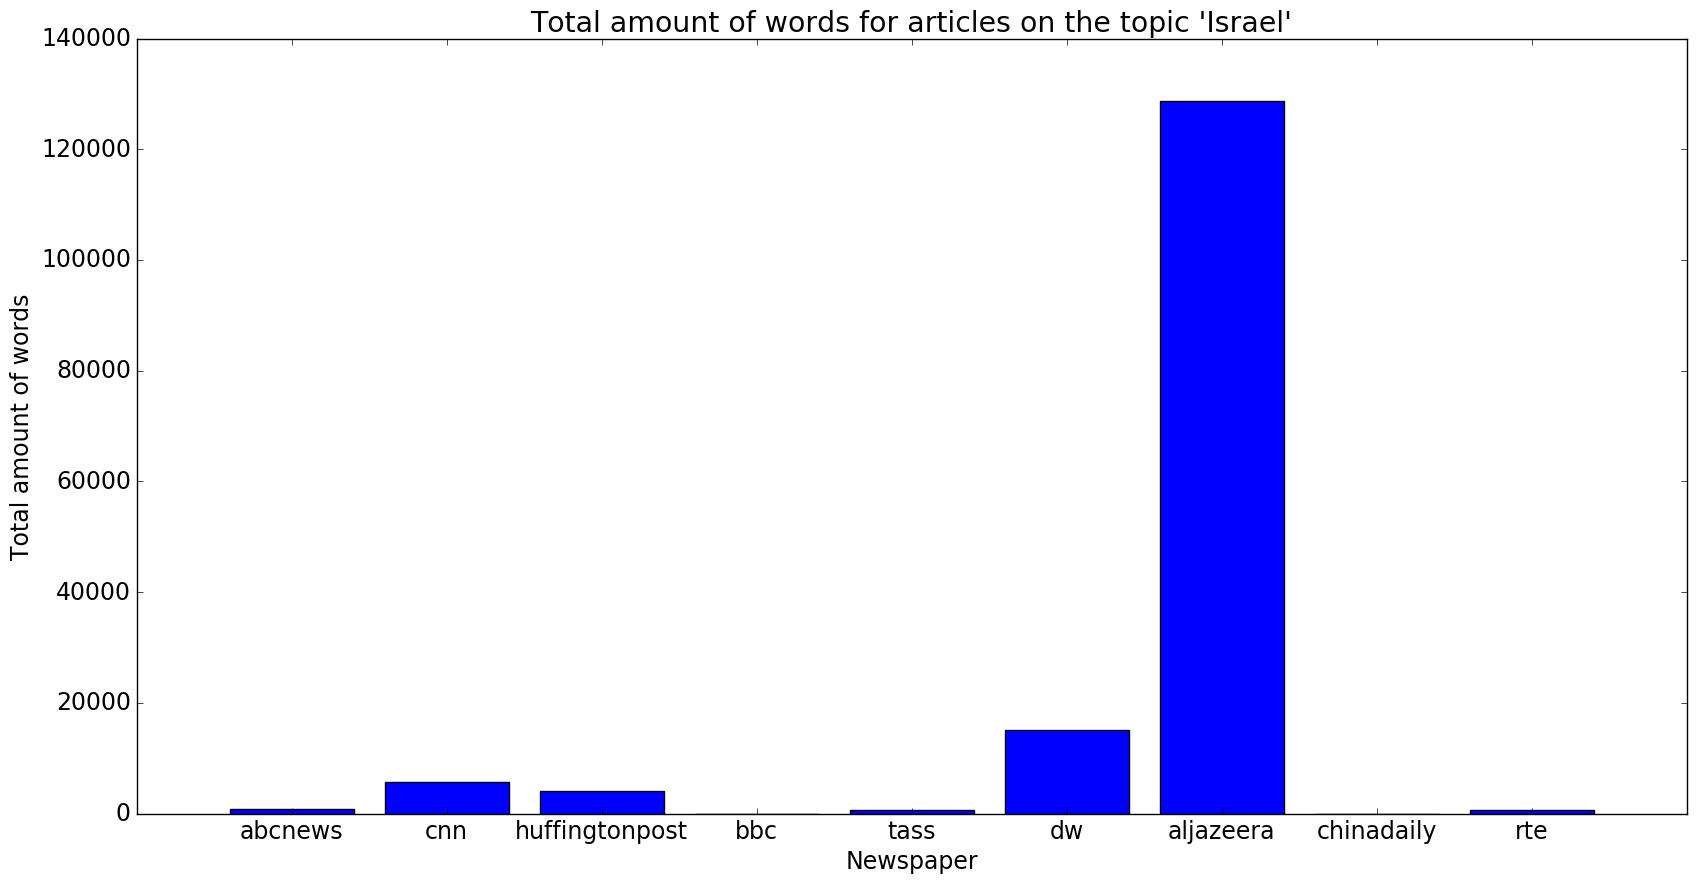

In [186]:
def total(media):

    c_total = 0.0
    rich_lst = []
    for i, link in enumerate(article_data['article_source_link']):
        if isinstance(article_data['title'][i], float) == True:
            pass
        else:
            if media in link and "Israel" in article_data['title'][i]:
                if isinstance(article_data['text'][i], float) == True:
                    pass
                else:
                    l_total = len(article_data['text'][i])
                    c_total += l_total
    return c_total
print "In all of the article texts together, abc news has a total of %s words." % str(total("abcnews"))
print "In all of the article texts together, cnn news has a total of %s words." % str(total("cnn"))
print "In all of the article texts together, huffingtonpost news has a total of %s words." % str(total("huffingtonpost"))
print "In all of the article texts together, bbc news has a total of %s words." % str(total("bbc"))
print "In all of the article texts together, tass news has a total of %s words." % str(total("tass"))
print "In all of the article texts together, dw news has a total of %s words." % str(total("dw.com"))
print "In all of the article texts together, aljazeera news has a total of %s words." % str(total("aljazeera"))
print "In all of the article texts together, cinadaily news has a total of %s words." % str(total("cinadaily"))
print "In all of the article texts together, rte news has a total of %s words." % str(total("rte"))

art_total = []
art_total.extend((total("abcnews"), total("cnn"), total("huffingtonpost"), total("bbc"), total("tass"), total("dw.com"), total("aljazeera"), total("cinadaily"), total("rte")))
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
font = {'family' : 'normal',
            'size'   : 17}

plt.rc('font', **font)
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
labels = ["abcnews", "cnn", "huffingtonpost", "bbc", "tass", "dw", "aljazeera", "chinadaily", "rte"]
plt.bar(x, art_total, align="center")
plt.title("Total amount of words for articles on the topic 'Israel'")
plt.ylabel("Total amount of words")
plt.xlabel("Newspaper")
plt.xticks(x, labels)
plt.show()

The difference in total words dedicated to this specific topic between the media channels is significant. The results show that Aljazeera News has the highest amount of words on texts of which Israel is the subject. It makes sense that this Middle Eastern news channel gives a lot of attention to news concerning the nearby Israel. This suggest that there is an important regional factor for diversity in media. That high amount of words also partially explain the lower percentage of unique words. The fact that Aljazeera News devotes so much attention to Israel-related articles will become even more interesting when this information is combined with the next part of the analysis which looks at the sentiment displayed in the texts.

### 3.3. Sentiment analysis

The next part will focus on sentiment analysis of articles for a specific topic from different newspapers. The different sentiments are a very important barometer for the diversity that is displayed in the content of the article. In a first analysis the TextBlob library will be used for an indication of the subjectivity ratings in the different texts. Textblob is a simplified Python library for processing textual data that according to its own website "stands on the giant shoulders of NLTK and pattern, and plays nicely with both"(https://textblob.readthedocs.io/en/dev/). The next part consists of an emotion analysis of the same subset of texts using IBM's Watson Natural Language Understanding API.

In [99]:
sub_lst = []
senti_lst = []
emotion_lst = []

In [115]:
def text_sentiment(media, topic):   
    lst_title = []
    for i, link in enumerate(article_data['article_source_link']):
        if media in link:
            if isinstance(article_data['title'][i], float) == True or isinstance(article_data['text'][i], float) == True:
                        pass

            else:
                
                if topic in article_data['title'][i]:
                    

                    lst_title.append(article_data['text'][i])

    return lst_title

# "abcnews", "cnn", "huffingtonpost", "bbc", "tass", "dw.com", "aljazeera", "cinadaily", "rte"
isr_art = ["abcnews", "cnn", "huffingtonpost", "tass", "dw", "rte"]

documents = text_sentiment("rte", "Israel")
document = " ".join(documents)
#removing non ascii
for item in document:

    if ord(item) > 128: # 1 - 128 is ascii
        document = document.replace(item, " ")
len_doc = len(document)

### Sentiment analysis with TextBlob

In [95]:
text = document
blob = TextBlob(text)
blob_senti = blob.sentiment
sub_lst.append(blob_senti[1])

In [96]:
print sub_lst
#abcnews, cnn, huffingtonpost, tass, dw, rte

[0.3351851851851852, 0.3090053763440861, 0.24260977118119972, 0.27964285714285714, 0.36614364120144477, 0.3032098765432099]


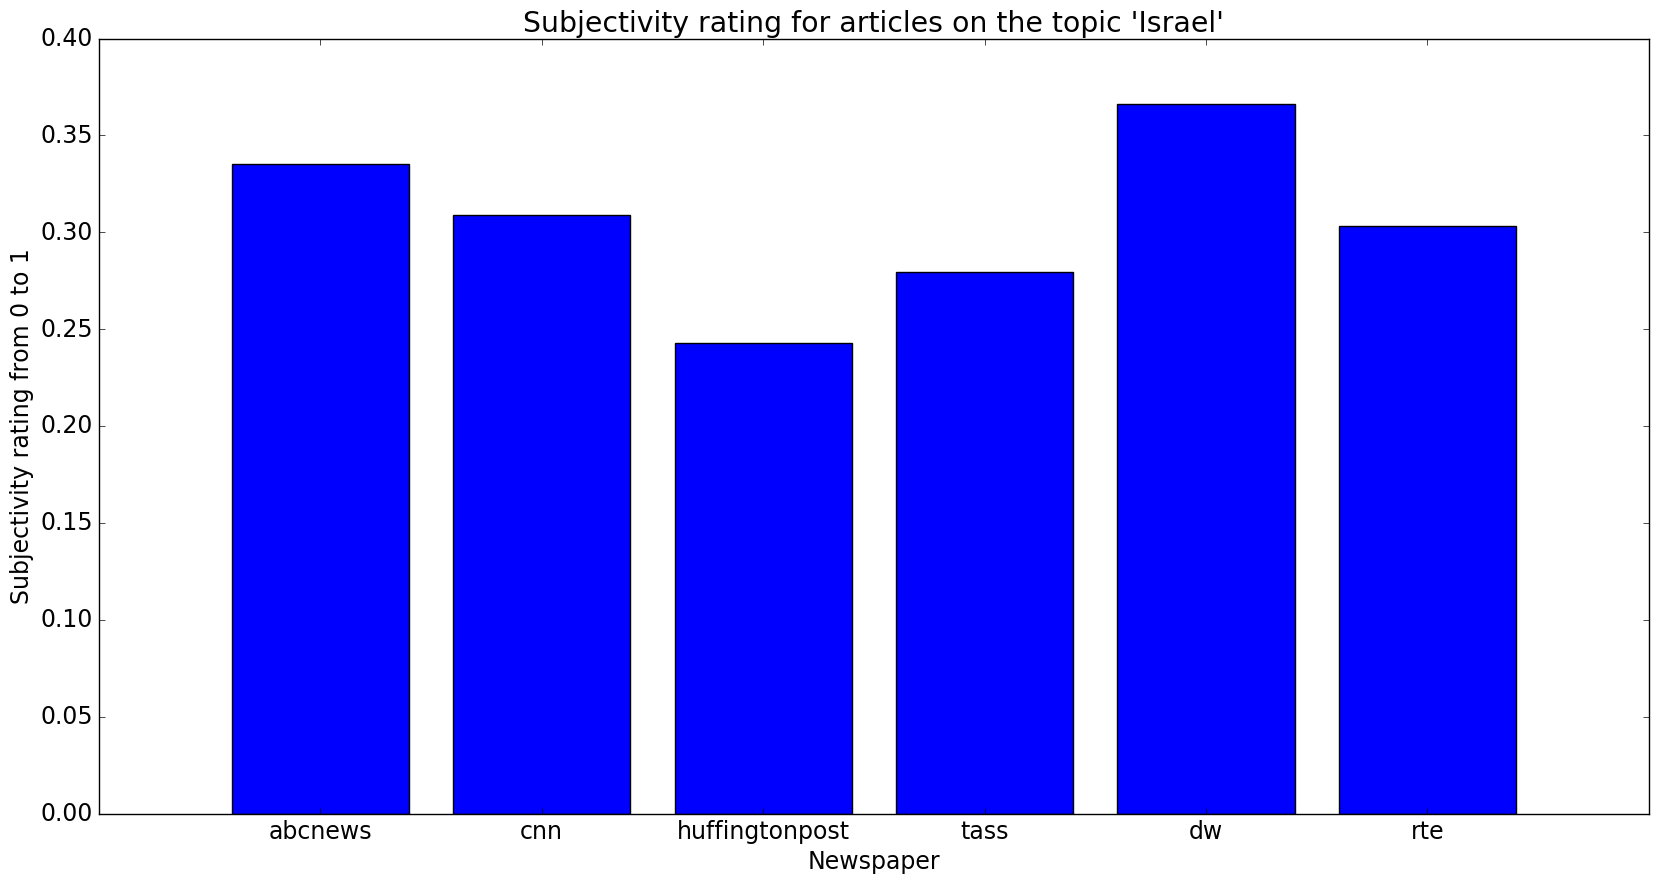

In [98]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
font = {'family' : 'normal',
            'size'   : 17}

plt.rc('font', **font)
x = [1, 2, 3, 4, 5, 6]
labels = ["abcnews", "cnn", "huffingtonpost", "tass", "dw", "rte"]
plt.bar(x, sub_lst, align="center")
plt.title("Subjectivity rating for articles on the topic 'Israel'")
plt.ylabel("Subjectivity rating from 0 to 1")
plt.xlabel("Newspaper")
plt.xticks(x, labels)
plt.show()

The subjectivity ratings from the TextBlob analysis demonstrate that all newspapers contain some kind of subjectivity towards the topic Israel. This can be no surprise, it is likely that articles on loaded topics are difficult to write in purely objective language. There is even a significant difference of more than 10% between the subjectivity rating of Huffintonpost news and DW news which shows a diversity between both media channels in terms of subjectivity. This kind of analysis would even become more interesting when the subjectivity ratings on different topics for the same newspaper are compared.

### Watson Natural Language API


In [116]:
senti = []
response = natural_language_understanding.analyze(
text= document,
features=[features.Entities(), features.Sentiment(), features.Emotion()])
senti.append(response["sentiment"]["document"])
senti.append(response["emotion"]["document"])

In [117]:
for keys, values in senti[0].iteritems():
    if isinstance(values, float):
        senti_lst.append(values)
for keys, values in senti[1].iteritems():
    emotion_lst.append(values)
print senti_lst, emotion_lst

[-0.310761, -0.372785, -0.153756, -0.615614, -0.37237, -0.656192] [{u'anger': 0.619384, u'joy': 0.000815, u'sadness': 0.126667, u'fear': 0.066242, u'disgust': 0.326358}, {u'anger': 0.446711, u'joy': 0.042625, u'sadness': 0.473836, u'fear': 0.496697, u'disgust': 0.460092}, {u'anger': 0.2177, u'joy': 0.150502, u'sadness': 0.23803, u'fear': 0.091149, u'disgust': 0.55535}, {u'anger': 0.193019, u'joy': 0.113308, u'sadness': 0.256311, u'fear': 0.225636, u'disgust': 0.221474}, {u'anger': 0.223728, u'joy': 0.133235, u'sadness': 0.516065, u'fear': 0.122131, u'disgust': 0.50862}, {u'anger': 0.225885, u'joy': 0.000318, u'sadness': 0.256891, u'fear': 0.378826, u'disgust': 0.291683}]


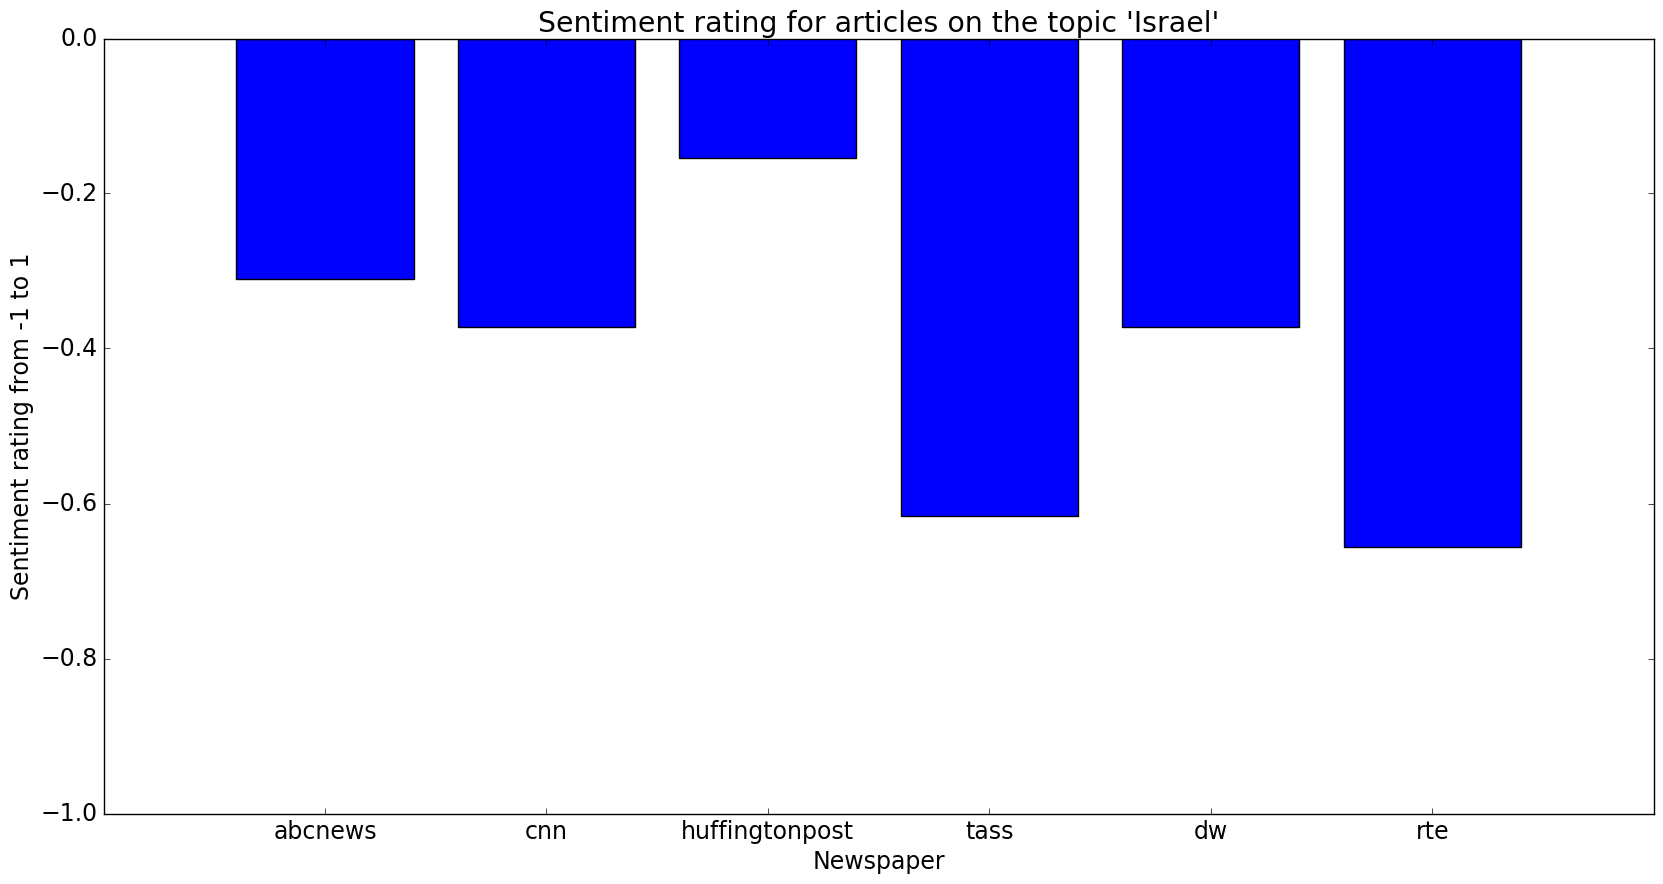

In [156]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
font = {'family' : 'normal',
        'size'   : 17}

plt.rc('font', **font)
x = [1, 2, 3, 4, 5, 6]
labels = ["abcnews", "cnn", "huffingtonpost", "tass", "dw", "rte"]
plt.bar(x, senti_lst, align="center")
plt.title("Sentiment rating for articles on the topic 'Israel'")
plt.ylabel("Sentiment rating from -1 to 1")
plt.xlabel("Newspaper")
plt.xticks(x, labels)
plt.ylim([-1,0])
plt.show()

The Watson Natural Language sentiment analysis looks for indicators of positive or negative feelings in a text with 1 being perfectly positive and -1 being perfectly negative. A first observation is that all the selected newspapers display a negative sentiment when publishing an article on Israel. It is important to note that a significant part of the articles for this topic describe things like tension, conflict and terrorism which can have an important effect on the sentiment analysis. A second observation is that even within the context of these negative sentiments there are still a significant differences between the information providers. The Russian Tass news, for example, shows a very negative attitude towards topics on Israel while this is not so much the case for the American Huffintonpost. There appears to be quite some diversity in terms of sentiment between the newspapers for topics on Israel. A following section will investigate whether there is also a similar diversification in the articles in terms of emotions.

In [160]:
abc_emo = []
cnn_emo = []
huff_emo = []
tass_emo = []
dw_emo = []
rte_emo = []
for item in emotion_lst:
    for keys, values in item.iteritems():
        
        if emotion_lst.index(item) == 0:
            abc_emo.append(values)
        elif emotion_lst.index(item) == 1:
            cnn_emo.append(values)
        elif emotion_lst.index(item) == 2:
            huff_emo.append(values)
        elif emotion_lst.index(item) == 3:
            tass_emo.append(values)
        elif emotion_lst.index(item) == 4:
            dw_emo.append(values)
        elif emotion_lst.index(item) == 5:
            rte_emo.append(values)
print abc_emo, cnn_emo, huff_emo, tass_emo, dw_emo, rte_emo


[0.619384, 0.000815, 0.126667, 0.066242, 0.326358] [0.446711, 0.042625, 0.473836, 0.496697, 0.460092] [0.2177, 0.150502, 0.23803, 0.091149, 0.55535] [0.193019, 0.113308, 0.256311, 0.225636, 0.221474] [0.223728, 0.133235, 0.516065, 0.122131, 0.50862] [0.225885, 0.000318, 0.256891, 0.378826, 0.291683]


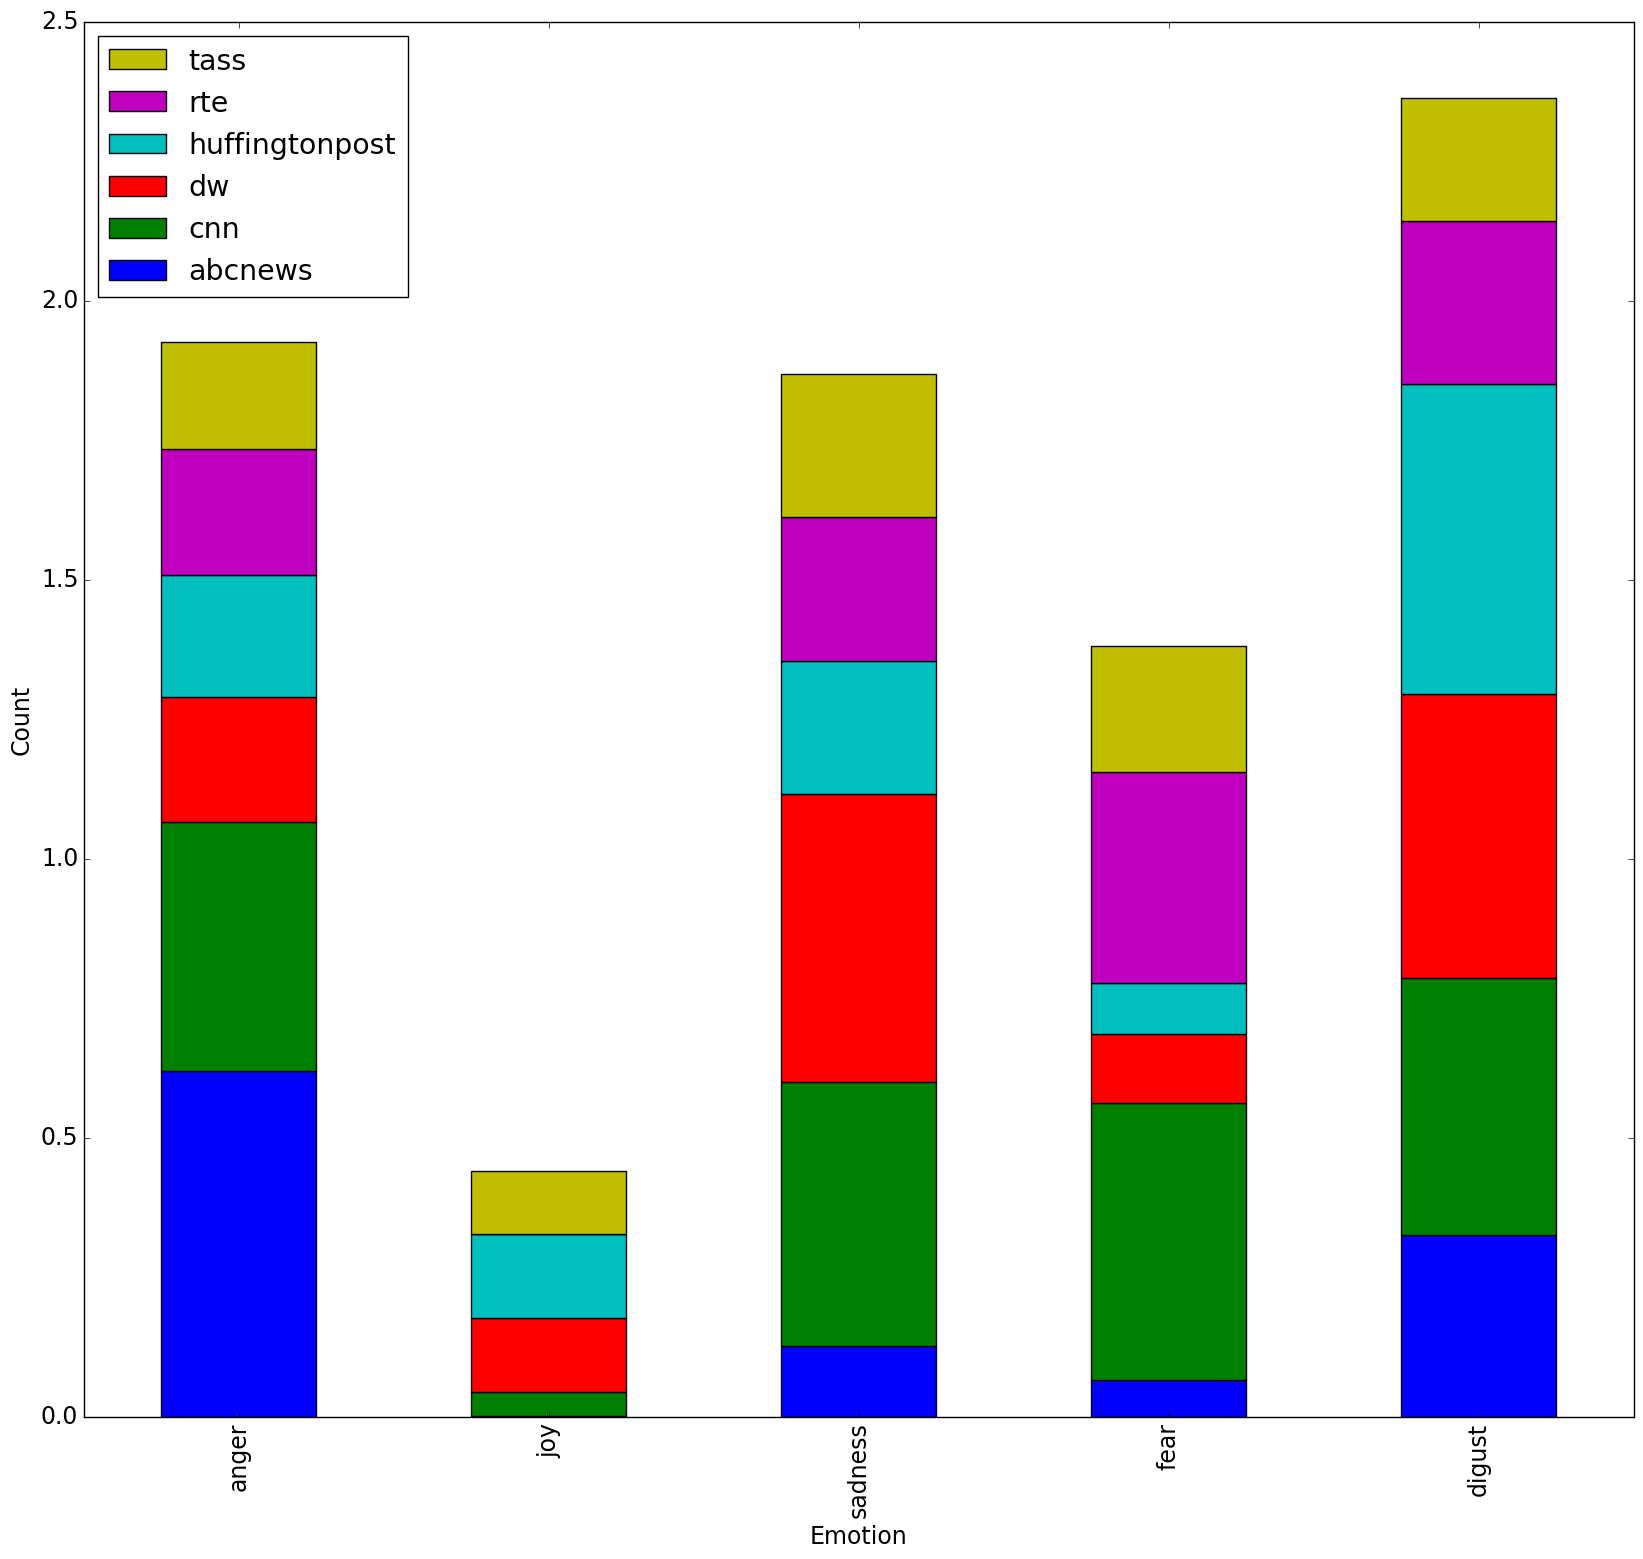

In [173]:
df=pd.DataFrame({'abcnews':abc_emo, 'cnn':cnn_emo, 'huffingtonpost':huff_emo, 'tass':tass_emo, 'dw':dw_emo, 'rte':rte_emo} , index=["anger", "joy", "sadness", "fear", "digust"])
ax = df.plot(kind='bar', stacked=True, figsize=(20,18), legend="reverse")
ax.set_xlabel("Emotion")
ax.set_ylabel("Count")
plt.show()

Articles on the Israel topic are characterised by almost no indicators of joy. This is contrasted by a very high amount of disgust in the texts. More interesting and significant is the difference in emotions between the media channels. AbcNews displays a very high amount of anger in the articles on Israel, the RTE texts demonstrate a majority of fear and CNN has almost equal amounts of anger, sadness, fear and disgust in its coverage on Israel related topics. The American Huffingtonpost that had the lowest percentage of subjectivity and negative sentiment now also seems to be the newspaper that shows the highest percentage of joy in articles on Israel.

### 3.4. Conclusion

In this short task I used preset text analysis tools to measure diversity in news articles concerning one specific topic: Israel. In ideal circumstances and with a lot of time this would have been done completely different and more similar to Kuang and Davison's approach. This would include generating features for indicating diversity based on own research and relevant literature, working with a large set of carefully selected training data and implying all this on test data. In my opinion, the features that take the context into account would be the most challenging but also the most promising for measuring diversity in texts.

Nevertheless, the analysis above demonstrates that although articles from different media channels have similar characteristics when discussing a similar topic, there are also indicators of diversity in the content. This is for example obvious in the striking amount of attention that Ajazeera news devoted to Israel related topics but also in more subtle differences in subjectivity, sentiment and emotion.